In [5]:
import pandas as pd 
import re
import numpy as np
#import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#from plotly.offline import init_notebook_mode, iplot
#from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import seaborn as sns
#from PIL import Image

## input：omdb資料集csv檔

## goal：做初步Transfrom 可以與其他資料集可以merge起來做EDA使用

## output：omdb_csv

In [2]:
# 讀取資料
omdb_data = pd.read_csv('./omdbdata1.csv')
omdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110590 entries, 0 to 110589
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   _id           110590 non-null  object 
 1   Title         110590 non-null  object 
 2   Year          110590 non-null  object 
 3   Rated         14140 non-null   object 
 4   Released      87337 non-null   object 
 5   Runtime       57532 non-null   object 
 6   Genre         97966 non-null   object 
 7   Director      18000 non-null   object 
 8   Writer        28317 non-null   object 
 9   Actors        101403 non-null  object 
 10  Plot          57131 non-null   object 
 11  Language      103443 non-null  object 
 12  Country       105805 non-null  object 
 13  Awards        17092 non-null   object 
 14  Poster        53454 non-null   object 
 15  Ratings       110590 non-null  object 
 16  Metascore     2801 non-null    float64
 17  imdbRating    57189 non-null   float64
 18  imdb

In [3]:
omdb_data['Title'] = omdb_data['Title'].astype(str)
omdb_data['Title'] = omdb_data['Title'].apply(lambda x : x.strip())
omdb_data.head()

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,"Karl Urban, Jack Quaid, Antony Starr, Erin Mor...",...,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BNGEyOG...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"207,800",tt1190634,series,3,True
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy","Eugene Levy, Catherine O'Hara, Dan Levy, Annie...",...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,https://m.media-amazon.com/images/M/MV5BNWQ1Zm...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.5,"49,018",tt3526078,series,6,True
2,5fb14937f686757a60e6dc69,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,"Lily Collins, Philippine Leroy-Beaulieu, Ashle...",...,NaN,https://m.media-amazon.com/images/M/MV5BYTFjZj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,7.2,"28,629",tt8962124,series,true,True
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,"Milo Ventimiglia, Mandy Moore, Sterling K. Bro...",...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,https://m.media-amazon.com/images/M/MV5BYjNlOW...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"99,283",tt5555260,series,5,True
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,"William Zabka, Tanner Buchanan, Mary Mouser, J...",...,Nominated for 2 Primetime Emmys. Another 8 nom...,https://m.media-amazon.com/images/M/MV5BYTI3Nj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"74,027",tt7221388,series,2,True


# 影集推薦系統  電影Type刪除

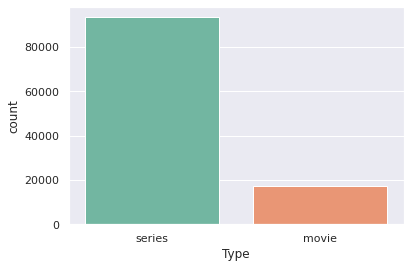

In [6]:
# data type movie and TV count
sns.set(style = 'darkgrid')
ax = sns.countplot(x= 'Type' ,data = omdb_data ,palette='Set2')

In [8]:
omdb_data = omdb_data[omdb_data.Type =='series']

In [9]:
# 刪除重複Title
omdb_data['Title'].drop_duplicates(inplace=True)

In [10]:
# 刪除不需要的欄位
omdb_data.drop(['Response','Poster','Metascore'],axis=1,inplace=True)

In [11]:
# 算出各欄位na值
missing_values_count = (omdb_data.isnull().sum()/110590) 
missing_values_count[:20]
# Writer ,Director,Award 缺值太多無法使用
#df.drop(['Writer','Director','Awards'],axis=1,inplace=True)

_id             0.000000
Title           0.000000
Year            0.000000
Rated           0.775260
Released        0.179926
Runtime         0.452437
Genre           0.107080
Director        0.829478
Writer          0.720183
Actors          0.070965
Plot            0.445926
Language        0.055864
Country         0.039325
Awards          0.744353
Ratings         0.000000
imdbRating      0.442545
imdbVotes       0.442807
imdbID          0.000000
Type            0.000000
totalSeasons    0.404331
dtype: float64

## 每一部演員不只一個，先拉出主要演員前三名

In [12]:
# 將actor 分成actor_123
omdb_data['Actor_1'] = omdb_data['Actors'].str.split(',').str.get(0)
omdb_data['Actor_2'] = omdb_data['Actors'].str.split(',').str.get(1)
omdb_data['Actor_3'] = omdb_data['Actors'].str.split(',').str.get(2)

In [13]:
omdb_data.rename(columns={'Actors':'Actors_list'})
# 刪除actors_list
omdb_data.drop('Actors',axis=1,inplace=True)

In [14]:
omdb_data.head()

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Plot,...,Awards,Ratings,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Actor_1,Actor_2,Actor_3
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,A group of vigilantes sets out to take down co...,...,Nominated for 1 Primetime Emmy. Another 1 win ...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"207,800",tt1190634,series,3,Karl Urban,Jack Quaid,Antony Starr
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy",When rich video-store magnate Johnny Rose and ...,...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.5,"49,018",tt3526078,series,6,Eugene Levy,Catherine O'Hara,Dan Levy
2,5fb14937f686757a60e6dc69,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,A young American woman from the Midwest is hir...,...,NaN,"[{""Source"":""Internet Movie Database"",""Value"":""...",7.2,"28,629",tt8962124,series,true,Lily Collins,Philippine Leroy-Beaulieu,Ashley Park
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,A heartwarming and emotional story about a uni...,...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"99,283",tt5555260,series,5,Milo Ventimiglia,Mandy Moore,Sterling K. Brown
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,Decades after their 1984 All Valley Karate Tou...,...,Nominated for 2 Primetime Emmys. Another 8 nom...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"74,027",tt7221388,series,2,William Zabka,Tanner Buchanan,Mary Mouser


## 欄位 Released 代表釋出年份，大概有兩成NA值，打算從年份資料拉出第一個年份補上NA值

## 年份格式ex:2015-2020 代表已完結 2015- 還在持續連載 

In [15]:
pd.unique(omdb_data['Year'])

array(['2019–', '2015–2020', '2020–', ..., '1929–1979', '1973–1989',
       '1967–1979'], dtype=object)

In [16]:
# 將年份(year)第一個數字取代 released 年份
omdb_data['Released_from_Year']  = omdb_data['Year'].str.split('–').str.get(0)
omdb_data['Released'].fillna(value=omdb_data['Released_from_Year'],inplace=True)

## 初始資料Released 剛開始有日期以及月份，後來補上的NA值的部分沒有月份以及日期，統一轉換年份格式

In [17]:
# 將released 設置為 datetime 將月份以及日期去掉 
omdb_data['Released'] = pd.to_datetime(omdb_data['Released'])
omdb_data['Released'] = omdb_data['Released'].dt.strftime('%Y')

In [18]:
# Finished
omdb_data['Released']

0         2019
1         2015
2         2020
3         2016
4         2018
          ... 
110585    2018
110586    2004
110587    1965
110588    2004
110589    2002
Name: Released, Length: 93452, dtype: object

## omdb_data.Released_from_Year 任務完成 drop掉

In [19]:
omdb_data.drop(['Released_from_Year'],axis=1,inplace=True)

## Award 得獎的欄位 發現有來自不同獎項 ⇒ 有艾美獎、金球獎、還有....等 不知名獎項

## goal：拉出艾美獎提名及得獎總數以及金球獎得獎以及提名總數

In [20]:
omdb_data['Awards'].head()

0    Nominated for 1 Primetime Emmy. Another 1 win ...
1    Won 9 Primetime Emmys. Another 59 wins & 122 n...
2                                                  NaN
3    Won 1 Golden Globe. Another 49 wins & 181 nomi...
4    Nominated for 2 Primetime Emmys. Another 8 nom...
Name: Awards, dtype: object

## Award 得獎欄位格式為:Nominated for 1 Primetime Emmy. Another 1 win & 5 nominations.

## split.取前段

In [21]:
Awards = omdb_data['Awards'].str.split('.')
Awards.str.get(0)

0          Nominated for 1 Primetime Emmy
1                   Won 9 Primetime Emmys
2                                     NaN
3                      Won 1 Golden Globe
4         Nominated for 2 Primetime Emmys
                       ...               
110585                                NaN
110586                                NaN
110587                                NaN
110588                                NaN
110589                                NaN
Name: Awards, Length: 93452, dtype: object

In [22]:
Nominated = omdb_data['Awards'].str.split('.').str.get(0)

In [23]:
 # 確認斷字位置
 pd.unique(Nominated)

array(['Nominated for 1 Primetime Emmy', 'Won 9 Primetime Emmys', nan,
       'Won 1 Golden Globe', 'Nominated for 2 Primetime Emmys',
       'Nominated for 5 Golden Globes', '6 wins & 26 nominations',
       'Won 1 Primetime Emmy', 'Nominated for 2 Golden Globes',
       'Won 2 Golden Globes', 'Nominated for 1 Golden Globe',
       '1 win & 9 nominations', 'Won 3 Primetime Emmys',
       '1 win & 2 nominations', '4 wins & 12 nominations',
       'Nominated for 3 Primetime Emmys', 'Won 5 Primetime Emmys',
       '2 wins & 17 nominations', 'Won 3 Golden Globes',
       'Won 2 Primetime Emmys', '1 nomination',
       'Nominated for 6 Golden Globes', 'Won 4 Golden Globes',
       '2 wins & 14 nominations', '12 wins & 29 nominations',
       '1 win & 15 nominations', '6 nominations',
       'Nominated for 4 Golden Globes', '10 nominations',
       '17 wins & 37 nominations', 'Won 7 Primetime Emmys',
       '2 wins & 4 nominations', '19 nominations',
       '4 wins & 19 nominations', 'Won 6

## 將Award 提取出 Nominated_Emmy Nominated_Golden Globe Emmy_winner Golden Globe winner

In [24]:
# about 529 have Nominated for Primetime Emmy
Nominated[Nominated.str.contains("Nominated for \d Primetime Emmy",na=False)]

0          Nominated for 1 Primetime Emmy
4         Nominated for 2 Primetime Emmys
18        Nominated for 2 Primetime Emmys
25        Nominated for 3 Primetime Emmys
42         Nominated for 1 Primetime Emmy
                       ...               
97990     Nominated for 4 Primetime Emmys
98089      Nominated for 1 Primetime Emmy
103420    Nominated for 3 Primetime Emmys
108149     Nominated for 1 Primetime Emmy
109343    Nominated for 2 Primetime Emmys
Name: Awards, Length: 500, dtype: object

In [25]:
omdb_data['Nominated_Emmy']= Nominated[Nominated.str.contains("Nominated for \d Primetime Emmy",na=False)]

In [26]:
omdb_data['Won_Emmy'] = Nominated[Nominated.str.contains("Won \d Primetime",na=False)]

In [27]:
omdb_data['Nominated_Golden_Globe'] = Nominated[Nominated.str.contains("Nominated for \d Golden Globe",na=False)]

In [28]:
omdb_data['Won_Golden_Globe']  = Nominated[Nominated.str.contains("Won \d Golden",na=False)]

# 將數目篩選出來

In [29]:
#get(2)
omdb_data['Nominated_Emmy'].str.split(' ')

0          [Nominated, for, 1, Primetime, Emmy]
1                                           NaN
2                                           NaN
3                                           NaN
4         [Nominated, for, 2, Primetime, Emmys]
                          ...                  
110585                                      NaN
110586                                      NaN
110587                                      NaN
110588                                      NaN
110589                                      NaN
Name: Nominated_Emmy, Length: 93452, dtype: object

In [30]:
omdb_data['Nominated_Emmy'].str.split(' ').str.get(2)

0           1
1         NaN
2         NaN
3         NaN
4           2
         ... 
110585    NaN
110586    NaN
110587    NaN
110588    NaN
110589    NaN
Name: Nominated_Emmy, Length: 93452, dtype: object

In [31]:
# 將數字提取取出來
omdb_data['Nominated_Emmy'] = omdb_data['Nominated_Emmy'].str.split(' ').str.get(2)

In [32]:
omdb_data[omdb_data['Nominated_Golden_Globe'].str.split(' ').notna()]['Nominated_Golden_Globe']

7         Nominated for 5 Golden Globes
12        Nominated for 2 Golden Globes
16         Nominated for 1 Golden Globe
19         Nominated for 1 Golden Globe
21        Nominated for 2 Golden Globes
                      ...              
75721     Nominated for 3 Golden Globes
79082      Nominated for 1 Golden Globe
83546     Nominated for 3 Golden Globes
92259      Nominated for 1 Golden Globe
104661    Nominated for 2 Golden Globes
Name: Nominated_Golden_Globe, Length: 252, dtype: object

In [33]:
omdb_data['Nominated_Golden_Globe'] = omdb_data['Nominated_Golden_Globe'].str.split(' ').str.get(2)

In [34]:
omdb_data[omdb_data['Nominated_Golden_Globe'].notna()]['Nominated_Golden_Globe']

7         5
12        2
16        1
19        1
21        2
         ..
75721     3
79082     1
83546     3
92259     1
104661    2
Name: Nominated_Golden_Globe, Length: 252, dtype: object

In [35]:
omdb_data['Won_Emmy'][omdb_data['Won_Emmy'].notna()]

1         Won 9 Primetime Emmys
11         Won 1 Primetime Emmy
20        Won 3 Primetime Emmys
27        Won 5 Primetime Emmys
30        Won 2 Primetime Emmys
                  ...          
96006      Won 1 Primetime Emmy
98653     Won 3 Primetime Emmys
101510     Won 1 Primetime Emmy
105700     Won 1 Primetime Emmy
109478     Won 1 Primetime Emmy
Name: Won_Emmy, Length: 383, dtype: object

In [36]:
omdb_data['Won_Emmy'] = omdb_data['Won_Emmy'].str.split(' ').str.get(1)

In [37]:
omdb_data['Won_Emmy'][omdb_data['Won_Emmy'].notna()]

1         9
11        1
20        3
27        5
30        2
         ..
96006     1
98653     3
101510    1
105700    1
109478    1
Name: Won_Emmy, Length: 383, dtype: object

In [38]:
omdb_data['Won_Golden_Globe'][omdb_data['Won_Golden_Globe'].notna()]

3          Won 1 Golden Globe
5          Won 1 Golden Globe
6          Won 1 Golden Globe
9          Won 1 Golden Globe
13         Won 1 Golden Globe
                 ...         
54685      Won 1 Golden Globe
71107      Won 1 Golden Globe
83189      Won 1 Golden Globe
88606     Won 2 Golden Globes
107537    Won 4 Golden Globes
Name: Won_Golden_Globe, Length: 207, dtype: object

In [39]:
omdb_data['Won_Golden_Globe'] = omdb_data['Won_Golden_Globe'].str.split(' ').str.get(1)

## 將nominated_emmy ,Nominated_Golden , Won_Golden , Won_Emmy na = 0
## 將得獎數字留下 其他nah 替換成 0
## 有NA值無法轉換資料型態

In [40]:
omdb_data.replace({"Nominated_Emmy":np.NaN,
              "Nominated_Golden_Globe":np.NaN,
              "Won_Golden_Globe":np.NaN,
              "Won_Emmy":np.NaN},value= 0 ,inplace=True)

In [42]:
# 找出不重複字串
pd.unique(omdb_data['Nominated_Golden_Globe'])

array([0, '5', '2', '1', '6', '4', '3', '8', '7'], dtype=object)

In [43]:
# 轉換dataframe 格式變成 int
# 確認是有資料
omdb_data['Nominated_Emmy'] = omdb_data['Nominated_Emmy'].astype(int)
omdb_data['Nominated_Emmy'].sort_values(ascending=False)

160       9
2739      9
9574      9
12191     8
36805     8
         ..
38283     0
38282     0
38281     0
38280     0
110589    0
Name: Nominated_Emmy, Length: 93452, dtype: int64

In [44]:
omdb_data['Nominated_Golden_Globe'] = omdb_data['Nominated_Golden_Globe'].astype(int)
omdb_data['Nominated_Golden_Globe'].sort_values(ascending=False)

286       8
3294      8
911       7
1946      7
337       7
         ..
38130     0
38129     0
38126     0
38125     0
110589    0
Name: Nominated_Golden_Globe, Length: 93452, dtype: int64

In [45]:
omdb_data['Won_Emmy'] = omdb_data['Won_Emmy'].astype(int)
omdb_data['Won_Emmy'].sort_values(ascending=False)

1         9
7123      9
32904     9
32        9
8394      8
         ..
38183     0
38182     0
38181     0
38180     0
110589    0
Name: Won_Emmy, Length: 93452, dtype: int64

In [46]:
omdb_data['Won_Golden_Globe'] = omdb_data['Won_Golden_Globe'].astype(int)
omdb_data['Won_Golden_Globe'].sort_values(ascending=False)

3272      8
2766      8
346       8
462       6
899       6
         ..
38106     0
38105     0
38104     0
38103     0
110589    0
Name: Won_Golden_Globe, Length: 93452, dtype: int64

In [47]:
omdb_data

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Plot,...,imdbID,Type,totalSeasons,Actor_1,Actor_2,Actor_3,Nominated_Emmy,Won_Emmy,Nominated_Golden_Globe,Won_Golden_Globe
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,A group of vigilantes sets out to take down co...,...,tt1190634,series,3,Karl Urban,Jack Quaid,Antony Starr,1,0,0,0
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy",When rich video-store magnate Johnny Rose and ...,...,tt3526078,series,6,Eugene Levy,Catherine O'Hara,Dan Levy,0,9,0,0
2,5fb14937f686757a60e6dc69,Emily in Paris,2020–,TV-MA,2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,A young American woman from the Midwest is hir...,...,tt8962124,series,true,Lily Collins,Philippine Leroy-Beaulieu,Ashley Park,0,0,0,0
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,A heartwarming and emotional story about a uni...,...,tt5555260,series,5,Milo Ventimiglia,Mandy Moore,Sterling K. Brown,0,0,0,1
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,Decades after their 1984 All Valley Karate Tou...,...,tt7221388,series,2,William Zabka,Tanner Buchanan,Mary Mouser,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110585,5fb149ccf686757a60e88c60,Sesame Street: T is for Train,2018–,NaN,2018,NaN,Family,NaN,NaN,NaN,...,tt8678994,series,NaN,NaN,NaN,NaN,0,0,0,0
110586,5fb149ccf686757a60e88c61,In2Minds,2004–,NaN,2004,NaN,Family,NaN,NaN,NaN,...,tt4226636,series,6,Angelo Andreou,Rachel Heaton,Ellie Kendrick,0,0,0,0
110587,5fb149ccf686757a60e88c62,Aus dem Tagebuch eines Minderjährigen,1965–,NaN,1965,25 min,NaN,NaN,NaN,NaN,...,tt0479317,series,true,Bernd Siegmundt,Jochen Thomas,Helga Raumer,0,0,0,0
110588,5fb149ccf686757a60e88c63,Schreinemakers,2004–,NaN,2004,50 min,Talk-Show,NaN,NaN,NaN,...,tt1116907,series,NaN,Margarethe Schreinemakers,NaN,NaN,0,0,0,0


# 處理totalSeasons值 將離群值資料刪除

# 人工選取離群值刪除

In [51]:
pd.unique(omdb_data['totalSeasons'])

array(['3', '6', '5', '2', '9', '10', '7', '12', '4', '11', '8', '32',
       '14', '24', '19', nan, '15', '17', '22', '21', '20', '13', '23',
       '46', '16', '29', '37', '50', '49', '26', '36', '47', '27', '31',
       '25', '18', '30', '42', '201', '34', '33', '28', '38', '44', '52',
       '59', '48', '35', '45', '55', '39', '51', '141', '43', '102', '71',
       '40', '154', '193', '53', '56', '54', '2000', '73', '41', '2013',
       '2015', '2018', '2011', '68', '2019', '57', '61', '99', '67',
       '2016', '2009', '60'], dtype=object)

## goal :true &  20<totalSeasons delete

In [50]:
omdb_data.drop(omdb_data[omdb_data.totalSeasons == 'true'].index,inplace=True)

In [52]:
pd.unique(omdb_data['totalSeasons'])

array(['3', '6', '5', '2', '9', '10', '7', '12', '4', '11', '8', '32',
       '14', '24', '19', nan, '15', '17', '22', '21', '20', '13', '23',
       '46', '16', '29', '37', '50', '49', '26', '36', '47', '27', '31',
       '25', '18', '30', '42', '201', '34', '33', '28', '38', '44', '52',
       '59', '48', '35', '45', '55', '39', '51', '141', '43', '102', '71',
       '40', '154', '193', '53', '56', '54', '2000', '73', '41', '2013',
       '2015', '2018', '2011', '68', '2019', '57', '61', '99', '67',
       '2016', '2009', '60'], dtype=object)

In [54]:
omdb_data.replace({"totalSeasons":np.NaN},value=0,inplace=True)

In [55]:
omdb_data['totalSeasons'] = omdb_data['totalSeasons'].astype(int)
omdb_data['totalSeasons'].sort_values(ascending=False)

58789     2019
46771     2018
89152     2016
46253     2015
75054     2013
          ... 
54894        0
54895        0
54900        0
54902        0
110589       0
Name: totalSeasons, Length: 62443, dtype: int64

In [61]:
omdb_data = omdb_data[omdb_data.totalSeasons <= 20]

In [62]:
omdb_data

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Plot,...,imdbID,Type,totalSeasons,Actor_1,Actor_2,Actor_3,Nominated_Emmy,Won_Emmy,Nominated_Golden_Globe,Won_Golden_Globe
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,A group of vigilantes sets out to take down co...,...,tt1190634,series,3,Karl Urban,Jack Quaid,Antony Starr,1,0,0,0
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy",When rich video-store magnate Johnny Rose and ...,...,tt3526078,series,6,Eugene Levy,Catherine O'Hara,Dan Levy,0,9,0,0
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,A heartwarming and emotional story about a uni...,...,tt5555260,series,5,Milo Ventimiglia,Mandy Moore,Sterling K. Brown,0,0,0,1
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,Decades after their 1984 All Valley Karate Tou...,...,tt7221388,series,2,William Zabka,Tanner Buchanan,Mary Mouser,2,0,0,0
5,5fb14937f686757a60e6dc6c,The Office,2005–2013,TV-14,2005,22 min,Comedy,NaN,"Greg Daniels, Ricky Gervais, Stephen Merchant",A mockumentary on a group of typical office wo...,...,tt0386676,series,9,Rainn Wilson,John Krasinski,Leslie David Baker,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110583,5fb149ccf686757a60e88c5e,Wild Cameramen at Work,2013–,NaN,2013,30 min,Documentary,NaN,NaN,NaN,...,tt5748402,series,0,David Attenborough,Doug Allen,Doug Anderson,0,0,0,0
110585,5fb149ccf686757a60e88c60,Sesame Street: T is for Train,2018–,NaN,2018,NaN,Family,NaN,NaN,NaN,...,tt8678994,series,0,NaN,NaN,NaN,0,0,0,0
110586,5fb149ccf686757a60e88c61,In2Minds,2004–,NaN,2004,NaN,Family,NaN,NaN,NaN,...,tt4226636,series,6,Angelo Andreou,Rachel Heaton,Ellie Kendrick,0,0,0,0
110588,5fb149ccf686757a60e88c63,Schreinemakers,2004–,NaN,2004,50 min,Talk-Show,NaN,NaN,NaN,...,tt1116907,series,0,Margarethe Schreinemakers,NaN,NaN,0,0,0,0


In [63]:
pd.unique(omdb_data['totalSeasons'])

array([ 3,  6,  5,  2,  9, 10,  7, 12,  4, 11,  8, 14, 19,  0, 15, 17, 20,
       13, 16, 18])

## First Transform is finished.

## Next Step merge new Feature Product Company 

In [67]:
omdb_data.to_csv('First_transform_Omdb.csv',index=False)

## Output:Fist_transform_Omdb.csv